<a href="https://colab.research.google.com/github/haileychoii/NLP_p/blob/main/sentiment_analysis_harrypotter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis- Harry Potter: Chamber of Secret

In [1]:
!pip install NRCLex

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43310 sha256=67bb6a99b0169178bd7fb958717cecfd05ec3f28b1749c847db1e7c06c7dc4fd
  Stored in directory: /root/.cache/pip/wheels/d2/10/44/6abfb1234298806a145fd6bcaec8cbc712e88dd1cd6cb242fa
Successfully built NRCLex


In [9]:
import matplotlib.pyplot as plt
!pip install --upgrade pip
!pip install --upgrade setuptools


In [3]:

!pip install NRCLex

In [4]:
import matplotlib.pyplot as plt
!pip install cufflinks
!pip install plotly
!pip install nltk
!pip install WordCloud
import cufflinks as cf
import pandas as pd
import plotly
import plotly.express as px
import numpy as np
import re
import nltk
import plotly.graph_objs as go
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
from PIL import Image
from plotly import tools
from plotly.offline import init_notebook_mode,iplot,plot
from nrclex import NRCLex


  Obtaining dependency information for jedi>=0.16 from https://files.pythonhosted.org/packages/8e/46/7e3ae3aa2dcfcffc5138c6cef5448523218658411c84a2000bf75c8d3ec1/jedi-0.19.0-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.3 MB/s eta 0:00:00


In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
from nltk.corpus import stopwords
! pip install colorama
from colorama import Fore, Back, Style

y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
stop = stopwords.words('english')

In [7]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [13]:
# df = pd.read_csv("C:/Users/jenny/OneDrive - 동덕여자대학교/PROJECT_/dataset_/hp_script2.csv", encoding = 'Latin-1')
# df.head(5)

In [14]:
# colab 사용 시
df = pd.read_csv('https://raw.githubusercontent.com/haileychoii/NLP_p/main/dataset/hp_script2.csv', encoding = 'Latin-1')
df.head()

,ID_number,scene,character_name,dialogue
0,1,1,Harry Potter,"I can't let you out, Hedwig. I'm not allowed t..."
1,2,1,Vernon Dursley,Harry Potter!!
2,3,1,Harry Potter,Now you've done it.
3,4,1,Petunia Dursley,"He's in there, Vernon."
4,5,1,Vernon Dursley,I'm warning you. If you can't control that blo...


## Text Processing

In [15]:
# Define a function to normalize text
def normalize_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return ' '.join(text.split())

# Apply the normalize_text function to the 'dialogue' column and create a new 'normalized_dialog' column
df['normalized_dialog'] = df['dialogue'].apply(normalize_text)

In [18]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
description_list=[]
for description in df['normalized_dialog']:
    description=re.sub("[^a-zA-Z]", " ", description)
    description=description.lower()
    description=nltk.word_tokenize(description)
    description=[word for word in description if not word in set(stopwords.words("english"))]
    lemma=nltk.WordNetLemmatizer()
    description=[lemma.lemmatize(word) for word in description]
    description=" ".join(description)
    description_list.append(description)
df["normalized_dialog_new"]=description_list

In [20]:
df['character_id'], _ = pd.factorize(df['character_name'])

In [21]:
df.head()

,ID_number,scene,character_name,dialogue,normalized_dialog,normalized_dialog_new,character_id
0,1,1,Harry Potter,"I can't let you out, Hedwig. I'm not allowed t...",i cant let you out hedwig im not allowed to us...,cant let hedwig im allowed use magic outside s...,0
1,2,1,Vernon Dursley,Harry Potter!!,harry potter,harry potter,1
2,3,1,Harry Potter,Now you've done it.,now youve done it,youve done,0
3,4,1,Petunia Dursley,"He's in there, Vernon.",hes in there vernon,he vernon,2
4,5,1,Vernon Dursley,I'm warning you. If you can't control that blo...,im warning you if you cant control that bloody...,im warning cant control bloody bird itll go,1


In [22]:
for i,row in df.iterrows():
    print(row['character_id'],row['character_name'])

0 Harry Potter
1 Vernon Dursley
0 Harry Potter
2 Petunia Dursley
1 Vernon Dursley
0 Harry Potter
1 Vernon Dursley
0 Harry Potter
3 Dudley Dursley
1 Vernon Dursley
2 Petunia Dursley
1 Vernon Dursley
2 Petunia Dursley
1 Vernon Dursley
3 Dudley Dursley
1 Vernon Dursley
0 Harry Potter
1 Vernon Dursley
1 Vernon Dursley
4 Dobby
0 Harry Potter
4 Dobby
0 Harry Potter
4 Dobby
0 Harry Potter
4 Dobby
0 Harry Potter
4 Dobby
0 Harry Potter
4 Dobby
0 Harry Potter
1 Vernon Dursley
4 Dobby
0 Harry Potter
4 Dobby
0 Harry Potter
4 Dobby
0 Harry Potter
4 Dobby
0 Harry Potter
4 Dobby
0 Harry Potter
1 Vernon Dursley
0 Harry Potter
1 Vernon Dursley
0 Harry Potter
1 Vernon Dursley
0 Harry Potter
1 Vernon Dursley
0 Harry Potter
4 Dobby
0 Harry Potter
4 Dobby
0 Harry Potter
4 Dobby
0 Harry Potter
4 Dobby
0 Harry Potter
4 Dobby
1 Vernon Dursley
1 Vernon Dursley
1 Vernon Dursley
5 Ron Weasley
0 Harry Potter
5 Ron Weasley
2 Petunia Dursley
1 Vernon Dursley
3 Dudley Dursley
6 George Weasley
3 Dudley Dursley
5 Ron 

In [23]:
from collections import Counter
character_counts = df['character_id'].value_counts()
top_5_characters = character_counts.head(5)
top_5_characters

0     251
5     139
15     70
18     44
24     43
Name: character_id, dtype: int64

In [24]:
character_counts = df['character_name'].value_counts()
top_5_characters = character_counts.head(5)
top_5_characters

Harry Potter         251
Ron Weasley          139
Hermione Granger      70
Gilderoy Lockhart     44
Albus Dumbledore      43
Name: character_name, dtype: int64

In [25]:
val_harry=[]
val_ron=[]
val_hermione=[]
val_gilderoy=[]
val_dumbledore=[]

for i,row in df.iterrows():
    val = row['normalized_dialog']
    if row['character_id'] == 0:
        val_harry.append(val)
    elif row['character_id']== 5:
        val_ron.append(val)
    elif row['character_id'] == 15:
        val_hermione.append(val)
    elif row['character_id']== 18:
        val_gilderoy.append(val)
    elif row['character_id']== 24:
        val_dumbledore.append(val)

In [26]:
pat = r'\b(?:{})\b'.format('|'.join(stop))
def text_cleaning(val_list):
    df1 = DataFrame (val_list,columns =['normalized_dialog']).dropna()
    df1["normalized_dialog"] = df1["normalized_dialog"].str.replace(pat, '')
    df1["normalized_dialog"] = df1["normalized_dialog"].str.replace(r'\s+', ' ')
    return df1

In [27]:
harry = text_cleaning(val_harry)
ron = text_cleaning(val_ron)
hermione = text_cleaning(val_hermione)
gilderoy = text_cleaning(val_gilderoy)
dubmbledore = text_cleaning(val_dumbledore)

<ipython-input-26-94a86309a716>:4: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-26-94a86309a716>:5: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-26-94a86309a716>:4: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-26-94a86309a716>:5: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-26-94a86309a716>:4: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-26-94a86309a716>:5: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-26-94a86309a716>:4: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-26-94a86309a716>:5: FutureWarning:

The default value of regex will 

## Word Clouds

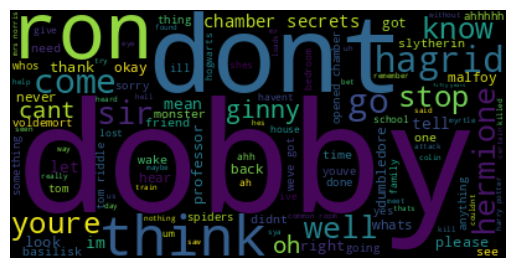

In [28]:
wc = WordCloud()
wc.generate(' '.join(harry['normalized_dialog']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

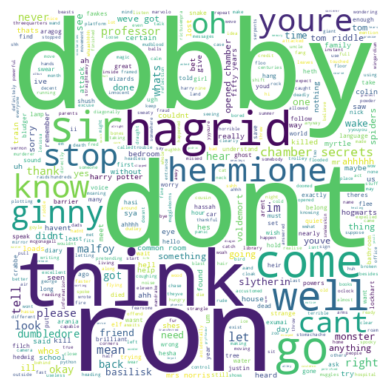

In [29]:
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=500)
wc.generate(' '.join(harry['normalized_dialog']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [30]:
def wordcloud(char,img_path,color):
    plt.subplots(figsize=(10,10))
    mask = np.array(Image.open(img_path))
    wc = WordCloud(stopwords=STOPWORDS,
                   mask=mask, background_color="white", contour_width=2, contour_color=color,
                   max_words=2000, max_font_size=256,
                   random_state=42, width=mask.shape[1],
                   height=mask.shape[0])
    wc.generate(' '.join(char['normalized_dialog']))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()

## Unigrams, Bigrams and Trigrams

In [31]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [32]:
def plot(x,char,name,w,p):
    common_words = x(char['normalized_dialog'], 20)
    common_words_df = DataFrame (common_words,columns=['word','freq'])

    plt.figure(figsize=(16, 10))
    sns.barplot(x='word', y='freq', data=common_words_df,palette=p)
    plt.title("Top 20 "+w+" used by "+name, fontsize=16)
    plt.ylabel("Frequency", fontsize=14)
    plt.yticks(fontsize=13)
    plt.xticks(rotation=90, fontsize=13)
    plt.xlabel("");

FileNotFoundError: ignored

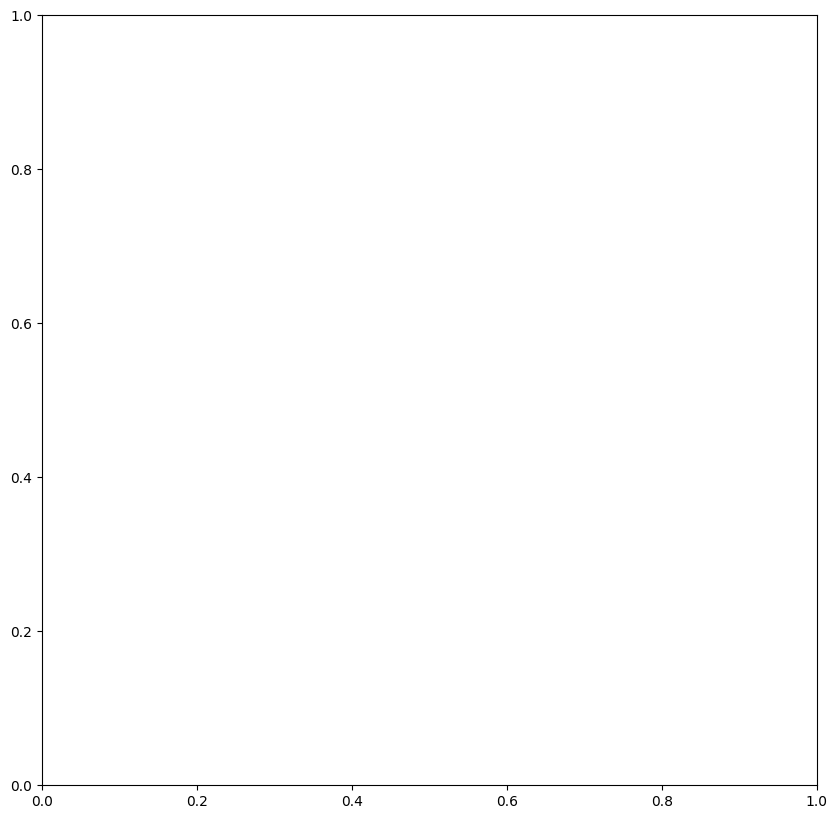

In [35]:
wordcloud(harry,'',"blue")

## NRCLex
* NRCLex will measure emotional affect from a body of text. Affect dictionary contains approximately 27,000 words, and is based on the National Research Council Canada(NRC) affect lexicon  and the NLTK library's WordNet synonym sets.

* Emotional afffects measured include the follwing:
 - fear
 - anger
 - anticipation
 - trust
 - surprise
 - positive
 - negative
 - sadness
 - disgust
 - joy



In [36]:
text_object = NRCLex(' '.join(df['normalized_dialog_new']))

In [38]:
text_object.affect_frequencies

{'fear': 0.10320641282565131,
 'anger': 0.09752839011356046,
 'anticip': 0.0,
 'trust': 0.12124248496993988,
 'surprise': 0.04241816967267869,
 'positive': 0.14963259853039412,
 'negative': 0.18236472945891782,
 'sadness': 0.10387441549766199,
 'disgust': 0.06579826319305278,
 'joy': 0.056112224448897796,
 'anticipation': 0.07782231128924516}

In [39]:
text_object.top_emotions

[('negative', 0.18236472945891782)]

In [40]:
sentiment_scores = pd.DataFrame(list(text_object.raw_emotion_scores.items()))

In [43]:
sentiment_scores = sentiment_scores.rename(columns={0: 'Sentiment', 1: 'Count'})
sentiment_scores


,Sentiment,Count
0,trust,363
1,anger,292
2,negative,546
3,sadness,311
4,fear,309
5,disgust,197
6,joy,168
7,positive,448
8,anticipation,233
9,surprise,127


In [44]:
fig = px.pie(sentiment_scores, values='Count', names='Sentiment',
             title='Sentiment Scores',
             hover_data=['Sentiment'])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [45]:
sentiment = sentiment_scores['Sentiment'].to_list()
sentiment

['trust',
 'anger',
 'negative',
 'sadness',
 'fear',
 'disgust',
 'joy',
 'positive',
 'anticipation',
 'surprise']

In [46]:
sentiment_words = pd.DataFrame(list(text_object.affect_dict.items()),columns = ['words','sentiments'])
sentiment_words

,words,sentiments
0,school,[trust]
1,harry,"[anger, negative, sadness]"
2,warning,[fear]
3,bloody,"[anger, disgust, fear, negative, sadness]"
4,secret,[trust]
...,...,...
445,sticky,[disgust]
446,repay,"[anger, anticipation, joy, positive, trust]"
447,promise,"[joy, positive, trust]"
448,applause,"[joy, positive, surprise, trust]"


In [47]:
for y in sentiment:
    sentiment_words[y] = 9
sentiment_words

,words,sentiments,trust,anger,negative,sadness,fear,disgust,joy,positive,anticipation,surprise
0,school,[trust],9,9,9,9,9,9,9,9,9,9
1,harry,"[anger, negative, sadness]",9,9,9,9,9,9,9,9,9,9
2,warning,[fear],9,9,9,9,9,9,9,9,9,9
3,bloody,"[anger, disgust, fear, negative, sadness]",9,9,9,9,9,9,9,9,9,9
4,secret,[trust],9,9,9,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...
445,sticky,[disgust],9,9,9,9,9,9,9,9,9,9
446,repay,"[anger, anticipation, joy, positive, trust]",9,9,9,9,9,9,9,9,9,9
447,promise,"[joy, positive, trust]",9,9,9,9,9,9,9,9,9,9
448,applause,"[joy, positive, surprise, trust]",9,9,9,9,9,9,9,9,9,9


In [48]:
a=0
for i in sentiment_words['sentiments']:
    for y in sentiment:
        sentiment_words[y][a] = int(y in i)
    a = a+1

In [49]:
sentiment_words.head(5)

,words,sentiments,trust,anger,negative,sadness,fear,disgust,joy,positive,anticipation,surprise
0,school,[trust],1,0,0,0,0,0,0,0,0,0
1,harry,"[anger, negative, sadness]",0,1,1,1,0,0,0,0,0,0
2,warning,[fear],0,0,0,0,1,0,0,0,0,0
3,bloody,"[anger, disgust, fear, negative, sadness]",0,1,1,1,1,1,0,0,0,0
4,secret,[trust],1,0,0,0,0,0,0,0,0,0


In [50]:
for y in sentiment:
    word_list = sentiment_words[sentiment_words[y]== 1].words.head(10)
    print(f"{y_}Sentiment:{y}")
    print(f"{r_}{word_list.values}\n")

Sentiment:trust
['school' 'secret' 'friend' 'sir' 'food' 'purely' 'goodness' 'good'
 'excellent' 'deal']

Sentiment:anger
['harry' 'bloody' 'ill' 'pretending' 'elf' 'offend' 'awful' 'bad'
 'witchcraft' 'terrible']

Sentiment:negative
['harry' 'bloody' 'lounge' 'ill' 'noise' 'pretending' 'mess' 'offend'
 'awful' 'bad']

Sentiment:sadness
['harry' 'bloody' 'ill' 'awful' 'bad' 'quiet' 'witchcraft' 'terrible'
 'devil' 'ruined']

Sentiment:fear
['warning' 'bloody' 'ill' 'elf' 'difficult' 'awful' 'bad' 'punish' 'warn'
 'witchcraft']

Sentiment:disgust
['bloody' 'ill' 'mess' 'elf' 'offend' 'awful' 'bad' 'terrible' 'devil'
 'ruined']

Sentiment:joy
['friend' 'baby' 'food' 'goodness' 'good' 'excellent' 'luck' 'deal'
 'greatness' 'happy']

Sentiment:positive
['friend' 'sir' 'grateful' 'baby' 'food' 'purely' 'goodness' 'graciously'
 'good' 'excellent']

Sentiment:anticipation
['goodness' 'arrive' 'good' 'luck' 'deal' 'career' 'time' 'wizard' 'warn'
 'happen']

Sentiment:surprise
['goodness' 'good